In [399]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = (10,6)

In [400]:
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)

In [401]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [402]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,5
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,5
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,5
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,5
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,5


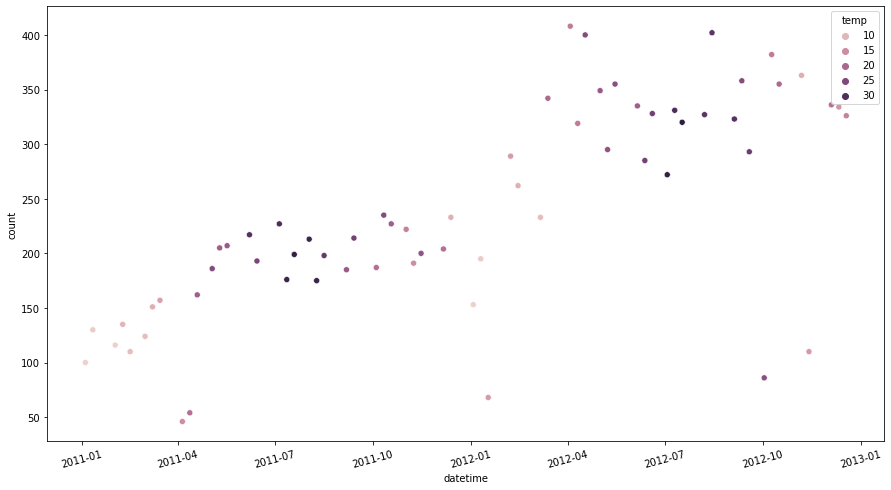

In [403]:
plt.figure(figsize=(15,8))#
sns.scatterplot(data =df[(df['hour']==9)&(df['weekday']==1)], x = 'datetime', y ='count',hue='temp')

plt.xticks(rotation=15)
#plt.ylabel('Temperature [C]')
#plt.xlabel('Date')
#plt.title('Max')
plt.show()

In [404]:
y = df['count']
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'weekday', 'hour']]


In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, ) #

In [406]:
ylog_train = np.log1p(y_train)
ylog_test = np.log1p(y_test)

In [407]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'weekday', 'hour'],
      dtype='object')

In [408]:
numerical_pipeline = Pipeline([
    ('num_scaler',StandardScaler()),
    ('num_discritazer',KBinsDiscretizer(n_bins=10, strategy='uniform'),)
])

In [409]:
categorical_pipeline = Pipeline([
    ('categorical_ohe',OneHotEncoder(sparse=False)),
])

In [410]:
polynomial_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3,)),
    ('categorical_ohe',OneHotEncoder(sparse=False)),
    
])

In [411]:
column_transformer = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,['windspeed', 'temp', 'atemp']), 
    ('categorical_pipeline',categorical_pipeline,['hour', 'weekday', 'workingday', 'weather', 'holiday',]),#
    ('polynomial', polynomial_pipeline, ['season', ]),
    ('do_nothing', 'passthrough',[])
])

In [412]:
column_transformer.fit(X_train) #learn how to do the transforamtion
X_train_fe = column_transformer.transform(X_train) #Do the accual transformation
X_test_fe = column_transformer.transform(X_test) #Do the same transformation on test set 

In [413]:
m = LinearRegression()

In [414]:
m.fit(X_train_fe,ylog_train)

LinearRegression()

In [415]:
m.score(X_train_fe,ylog_train)

0.8059324253911493

In [416]:
m.score(X_test_fe,ylog_test)

0.8036772825891552

In [417]:
y_predlog = m.predict(X_test_fe)

In [418]:
ypred = np.exp(y_predlog)-1

In [419]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

53556.419648660005

In [420]:

from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, ypred)

0.4021659223783616